In [ ]:
# Set up directories: update the base_dir if your folder is in a different location
import os
base_dir = '/content/drive/MyDrive/chest_xray' 
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense


In [ ]:
# Set image parameters and batch size
img_height, img_width = 150, 150
batch_size = 32

In [ ]:
# Create data generators for augmentation (only for training) and rescaling (for validation & test)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [ ]:
# For validation and test, we only need to rescale.
val_test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
# Flow training images in batches using train_datagen
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # binary since we have two classes: NORMAL and PNEUMONIA
)



Found 216 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches using val_test_datagen
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)



Found 16 images belonging to 2 classes.


In [ ]:
# Flow test images in batches using val_test_datagen
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Keep order for evaluation
)

Found 132 images belonging to 2 classes.


In [ ]:
# Display sample images from training data for both classes
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of training images and labels
images, labels = next(train_generator)

# Get the mapping from class names to indices
print("Class indices:", train_generator.class_indices)
# For example, it might print: {'NORMAL': 0, 'PNEUMONIA': 1}

Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}


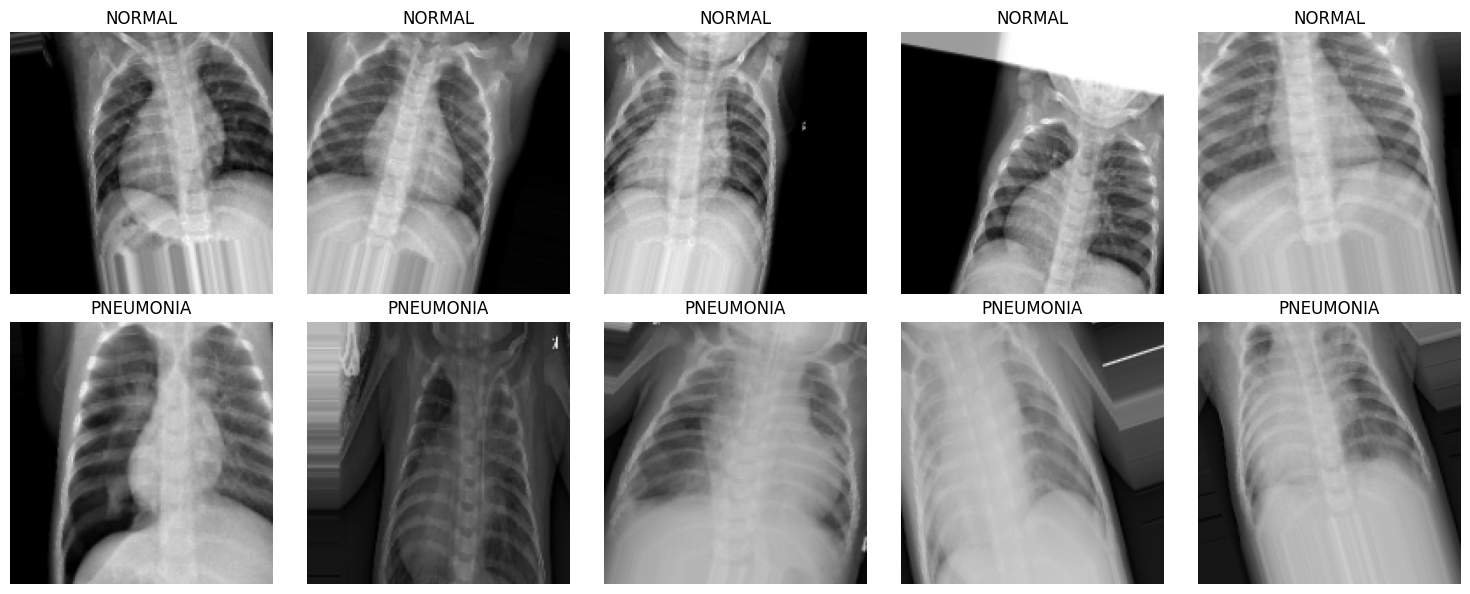

In [ ]:
#Identifying indices for each class
normal_indices = np.where(labels == 0)[0]
pneumonia_indices = np.where(labels == 1)[0]

# Determine number of images to display per class (up to 5)
num_display = 5

fig, axes = plt.subplots(2, num_display, figsize=(15,6))

for i in range(num_display):
    # Plot NORMAL images if available
    if i < len(normal_indices):
        axes[0, i].imshow(images[normal_indices[i]])
        axes[0, i].set_title("NORMAL")
    axes[0, i].axis("off")

    # Plot PNEUMONIA images if available
    if i < len(pneumonia_indices):
        axes[1, i].imshow(images[pneumonia_indices[i]])
        axes[1, i].set_title("PNEUMONIA")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# CNN model
model = Sequential([
    Conv2D(32, (3,3), input_shape=(img_height, img_width, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(1),
    Activation('sigmoid')  # sigmoid for binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Display model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
epochs = 10  # You can adjust the number of epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.5505 - loss: 1.1737 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4062 - loss: 0.6999

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4062 - loss: 0.6999 - val_accuracy: 0.5000 - val_loss: 0.6961
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5732 - loss: 0.6905 - val_accuracy: 0.5000 - val_loss: 0.7090
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.5625 - loss: 0.6785 - val_accuracy: 0.5000 - val_loss: 0.7166
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6451 - loss: 0.6655 - val_accuracy: 0.5000 - val_loss: 0.7101
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.5625 - loss: 0.6790 - val_accuracy: 0.5000 - val_loss: 0.7053
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5919 - loss: 0.6759 - val_accuracy: 0.4375 - val_loss: 0.7324
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7188 - loss: 0.5894 - val_accuracy: 0.4375 - val_loss: 0.7473
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6886 - loss: 0.6124 - val_accuracy: 0.5000 - val_loss: 0.8296
Epoch 10/10
6

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.3250 - loss: 1.1761
Test accuracy: 0.484375


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

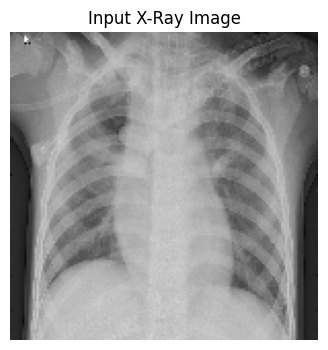

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Prediction probability: 0.8357329
Predicted Class: PNEUMONIA
Confidence: 83.57%


In [ ]:
# Specify the path to the x-ray image 
sample_image_path = '/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person10_virus_35.jpeg'

# Load and preprocess the image
img = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale as done in the data generator
img_array_expanded = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis("off")
plt.title("Input X-Ray Image")
plt.show()

# Make a prediction on the image
pred = model.predict(img_array_expanded)
print("Prediction probability:", pred[0][0])

# Determining the class based on the probability threshold (0.5)
if pred[0][0] < 0.5:
    pred_class = "NORMAL"
    confidence = (1 - pred[0][0]) * 100
else:
    pred_class = "PNEUMONIA"
    confidence = pred[0][0] * 100

print("Predicted Class:", pred_class)
print("Confidence: {:.2f}%".format(confidence))